In [122]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import FunctionTransformer, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [4]:
df = pd.read_json('bgg_data_clean.json',orient='split')
df.head(10)

,year,age,num_players,duration,mechanics,categories,families,num_expansions,num_honors,num_episodes,poll_age,poll_numpl,num_rated,num_comments,rating,bayes_rating
387,2000,10,"[3, 7]","[45.0, 45.0, 45.0]",[Hand Management],"[Bluffing, Card Game]",[Series: Blue Games (Descartes)],0,0,0,"[[2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [8, 0...","[[1, [0, 0, 4]], [2, [0, 0, 4]], [3, [0, 6, 0]...",337,133,5.81844,5.55090
475,2000,12,"[2, 5]","[90.0, 45.0, 90.0]","[Auction, Card Drafting, Hand Management, Netw...","[Bluffing, Political]","[Cities: Agra (India), Country: India, Series:...",0,5,5,"[[2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [8, 1...","[[1, [0, 0, 84]], [2, [0, 14, 82]], [3, [13, 6...",7149,2231,7.27751,6.93109
478,2000,10,"[2, 8]","[60.0, 20.0, 60.0]","[Action Drafting, Card Drafting, Drafting, Los...","[Bluffing, Card Game, City Building, Deduction...","[Mechanism: Tableau Building, Series: Fantasy ...",1,7,17,"[[2, 0], [3, 0], [4, 0], [5, 0], [6, 14], [8, ...","[[1, [1, 4, 612]], [2, [179, 313, 423]], [3, [...",49176,9840,7.07999,6.97364
481,2000,12,"[2, 4]","[60.0, 60.0, 60.0]","[Area Majority / Influence, Dice Rolling, Hand...","[Abstract Strategy, Medieval, Territory Building]",[Digital Implementations: Yucata],0,1,3,"[[2, 0], [3, 0], [4, 0], [5, 1], [6, 0], [8, 0...","[[1, [0, 0, 54]], [2, [35, 54, 7]], [3, [58, 3...",3429,1094,6.81879,6.38725
490,2000,12,"[2, 6]","[60.0, 60.0, 60.0]","[Dice Rolling, Hexagon Grid]","[Fantasy, Mythology, Print & Play, Wargame]",[],0,1,0,"[[2, 0], [3, 0], [4, 0], [5, 0], [6, 1], [8, 4...","[[1, [0, 2, 2]], [2, [8, 3, 0]], [3, [1, 6, 3]...",262,201,7.70292,5.65154
491,2000,12,"[3, 5]","[60.0, 50.0, 60.0]","[Area Majority / Influence, Card Drafting, Han...","[Medieval, Territory Building]",[Series: Web of Power / China],8,3,4,"[[2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [8, 2...","[[1, [0, 0, 44]], [2, [0, 3, 45]], [3, [65, 17...",3369,1095,7.29773,6.68319
492,2000,10,"[3, 5]","[90.0, 60.0, 90.0]","[Auction, Set Collection, Worker Placement]","[Arabian, Bluffing, Fantasy, Medieval]","[Creatures: Dragons, Folk Tales & Fairy Tales:...",0,3,2,"[[2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [8, 2...","[[1, [0, 0, 23]], [2, [1, 1, 24]], [3, [4, 19,...",3111,1162,6.90465,6.41011
495,2000,10,"[3, 6]","[60.0, 60.0, 60.0]",[Set Collection],[Pirates],[Theme: Time Travel],0,0,0,"[[2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [8, 0...","[[1, [0, 0, 1]], [2, [0, 1, 0]], [3, [2, 2, 1]...",253,104,5.56482,5.50884
497,2000,10,"[3, 5]","[30.0, 30.0, 30.0]","[Hand Management, Set Collection]",[Card Game],"[Creatures: Vampires, Series: à la Carte (Gold...",0,0,0,"[[2, 0], [3, 0], [4, 0], [5, 1], [6, 6], [8, 1...","[[1, [0, 0, 4]], [2, [0, 1, 3]], [3, [3, 6, 1]...",606,219,5.92659,5.61051
509,2000,10,"[2, 2]","[60.0, 60.0, 60.0]","[Dice Rolling, Set Collection]",[Card Game],"[Animals: Fish / Fishes, Players: Two Player O...",0,0,1,"[[2, 0], [3, 0], [4, 0], [5, 0], [6, 1], [8, 4...","[[1, [0, 0, 5]], [2, [4, 1, 0]], [2, [0, 0, 5]]]",750,302,5.69661,5.55657


In [27]:
all_mechanics = { x for xs in df['mechanics'] for x in xs }
print(len(all_mechanics))

172


In [10]:
all_categories = { x for xs in df['categories'] for x in xs }
print(len(all_categories))

84


In [15]:
class DictEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        for xs in X:
            yield { x: 1 for x in xs }

In [149]:
binary_encoder = Pipeline([
    ('encode',   DictEncoder()),
    ('vectorize',DictVectorizer())
])
X_all = Pipeline([
    ('attrs',ColumnTransformer([
        ('mechanics',binary_encoder,'mechanics'),
        ('categories',binary_encoder,'categories')
    ]))
]).fit_transform(df)
X_all

<23530x256 sparse matrix of type '<class 'numpy.float64'>'
	with 143670 stored elements in Compressed Sparse Row format>

In [41]:
y_all = df['rating'].to_numpy()

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_all, test_size=0.35, random_state=123)

In [46]:
model = Pipeline([
    ('ridge',Ridge(alpha=10))
])
model.fit(X_train,y_train)

Pipeline(steps=[('ridge', Ridge(alpha=10))])

In [47]:
model.score(X_test, y_test)

0.4566269148906632

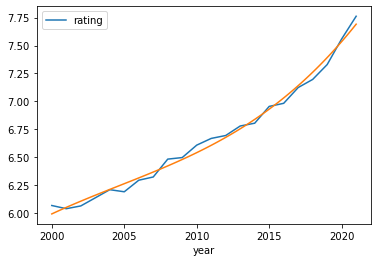

In [140]:
year_rating = df[['year','rating']].groupby('year').mean()
year_rating.plot()
year_rating_model = Pipeline([
    ('poly',PolynomialFeatures(3)),
    ('linear',LinearRegression())
]).fit(
    year_rating.index .to_numpy().reshape(-1,1),
    year_rating.rating.to_numpy()
)
xs = np.linspace(2000,2021,100)
plt.plot(xs,year_rating_model.predict(xs.reshape(-1,1)))

In [146]:
y_all = df['rating'].to_numpy() / year_rating_model.predict( df['year'].to_numpy().reshape(-1,1) )

X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_all, test_size=0.35, random_state=123)

model = Pipeline([
    ('ridge',Ridge(alpha=10))
])
model.fit(X_train,y_train)

model.score(X_test, y_test)

0.43260244971123074